# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import epidemics_helper
import numpy as np

In [2]:
def load():
    with open('../data/nyc_augmented_network.json', 'r') as f:
        data = json.load(f)
    return nx.node_link_graph(data)

In [3]:
def color(node, time, sir):
    status = sir.get_node_status(node, time)
    if status == 0: #susceptible
        return "green"
    elif status == 1: #infected
        return "red"
    else: #recovered
        return "blue"

In [4]:
def color_map(time, sir):
    color_node = []
    for i in range(0,len(G.nodes)):
        color_node.append(color(i,time, sir))
    return color_node

In [5]:
def get_status(G, sir):
    times = np.arange(101) #day 0 to 100 = 101 days
    susceptible = np.zeros(101)
    infected = np.zeros(101)
    recovered = np.zeros(101)
    for time in times:
        for node in range(G.number_of_nodes()):
            node_status = sir.get_node_status(node, time)
            if node_status == 0:
                susceptible[time] = susceptible[time] + 1
            elif node_status == 1:
                infected[time] = infected[time] + 1
            else:
                recovered[time] = recovered[time] + 1
    return susceptible, infected, recovered

In [6]:
def draw_graph(time, sir):
    color_node = color_map(time=time, sir=sir)
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G,pos=coord, node_color=color_node, with_labels=False, node_size=1, linewidths = 0.1, alpha=0.8)
    plt.title('Day ' + str(time))
    plt.axis('off')

In [7]:
def plot(s, i, r, number_of_nodes):
    times = np.arange(101)
    plt.plot(times, s / number_of_nodes * 100, label = "Susceptibles", color="green")
    plt.plot(times, r / number_of_nodes * 100, label = "Recoveries", color="blue")
    plt.plot(times, i / number_of_nodes * 100, label = "Infections", color="red")
    plt.legend()
    plt.grid()
    plt.xlabel("time (in day)")
    plt.ylabel("% of susceptibles/recoveries/infections at time t")
    plt.show()

In [8]:
def simulate(G, beta=10., gamma=0.1, source=23654, max_time=100.):
    sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
    sir.launch_epidemic(source=source, max_time=max_time)
    s, i, r = get_status(G, sir)
    return s, i, r, sir

In [9]:
def simulate_and_plot(G, beta=10., gamma=0.1, source=23654, max_time=100.):
    s, i, r,_ = simulate(G, beta=beta, gamma=gamma, source=source, max_time=max_time)
    plot(s, i, r, G.number_of_nodes())

In [10]:
number_of_nodes_of_G = load().number_of_nodes()

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [11]:
G = load()

Epidemic stopped after 132.44 days | 132.44 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


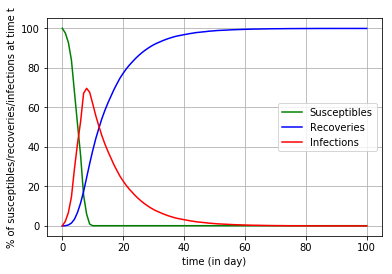

In [12]:
s, i, r, sir = simulate(G)
plot(s, i, r, G.number_of_nodes())

In [13]:

#60% of the population is infected at the same time:
arg_infected = np.argwhere(i/G.number_of_nodes()>=0.6)
print("we have to wait " + str(arg_infected[0]) + " days before at least 60% of the populations is infected at the same time")

#60% of the population has recovered
arg_recovered = np.argwhere(r/G.number_of_nodes() >= 0.6)
print("we have to wait " + str(arg_recovered[0]) + " days before at least 60% of the populations has recovered")


we have to wait [7] days before at least 60% of the populations is infected at the same time
we have to wait [15] days before at least 60% of the populations has recovered


In [14]:
coord = {i:G.nodes[i]['coordinates'] for i in range(len(G.nodes))}

/opt/anaconda3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


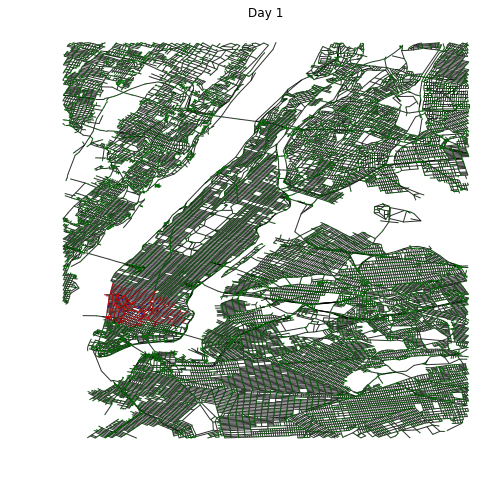

In [15]:
# at time t = 1
draw_graph(time=1, sir=sir)

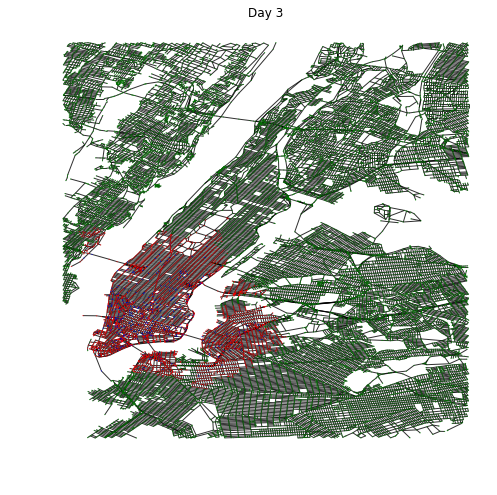

In [16]:
# at time t = 3
draw_graph(time=3, sir=sir)

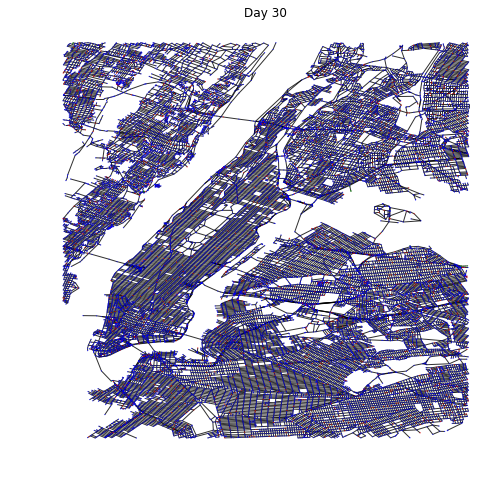

In [17]:
# at time t = 30
draw_graph(time=30, sir=sir)

#### exercice 2.10: strategy 1

In [18]:
import random
from random import choice

In [19]:
def strategy(budget, iteration, beta, gamma, max_time, strat):
    susceptible = np.zeros(101)
    infected = np.zeros(101)
    recovered = np.zeros(101)
    for _ in range(iteration):
        G = load()
        if strat == "strat 1":
            G = first_removal_strategy(G, budget)
        elif strat == "strat 2":
            G = second_removal_strategy(G, budget)
        else:
            break
        nodes = list(G.nodes)
        source = choice(nodes)
        s, i, r, sir = simulate(G,beta=beta, gamma=gamma, source=source, max_time=max_time)
        draw_graph(30, sir)
        susceptible += s
        infected += i
        recovered += r
    
    return susceptible/iteration, infected/iteration, recovered/iteration

In [20]:
def remove_edges(G, list_edges):
    G.remove_edges_from(list_edges)
    return G

In [21]:
def first_removal_strategy(G, budget):
    sample = random.sample(list(G.edges()), budget)
    return remove_edges(G, sample)

Epidemic stopped after 101.26 days | 101.26 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 119.30 days | 119.30 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered


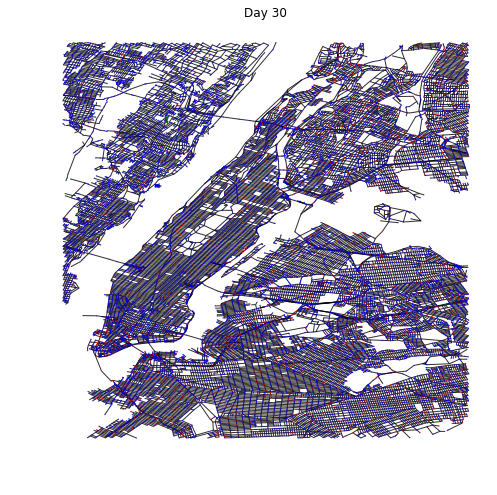

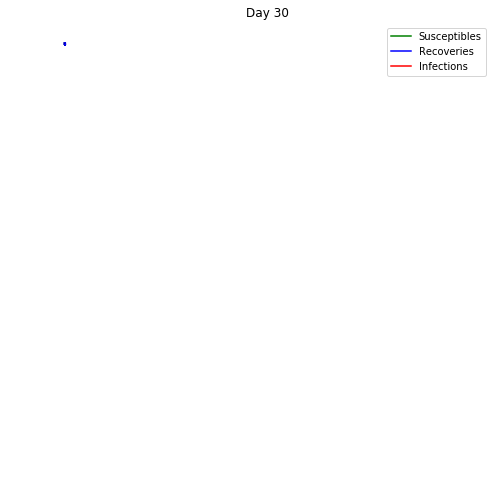

In [22]:
budget = 1000
iteration = 2
beta = 10.
gamma = 0.1
max_time = 100.
mean_s, mean_i, mean_r = strategy(budget, iteration, beta, gamma, max_time, "strat 1")
plot(mean_s, mean_i, mean_r, load().number_of_nodes())

In [23]:
day = 30
print("On average, on day " + str(day) + ", " + str(mean_s[day]/(number_of_nodes_of_G-budget)) + "% of people are susceptible")
print("On average, on day " + str(day) + ", " + str(mean_i[day]/(number_of_nodes_of_G-budget)) + "% of people are infected")
print("On average, on day " + str(day) + ", " + str(mean_r[day]/(number_of_nodes_of_G-budget)) + "% of people are recovered")

On average, on day 30, 0.004002982614497076% of people are susceptible
On average, on day 30, 0.14165456614732547% of people are infected
On average, on day 30, 0.893587378831286% of people are recovered


removing 1000 edges do not change much. We can see that at the maximum number of people infected at the same time, we go from about 65% to 60%.

Epidemic stopped after 100.48 days | 100.48 days elapsed | 7.5% susceptible, 0.0% infected, 92.4% recovered
Epidemic stopped after 100.57 days | 100.57 days elapsed | 20.0% susceptible, 0.0% infected, 80.0% recovered


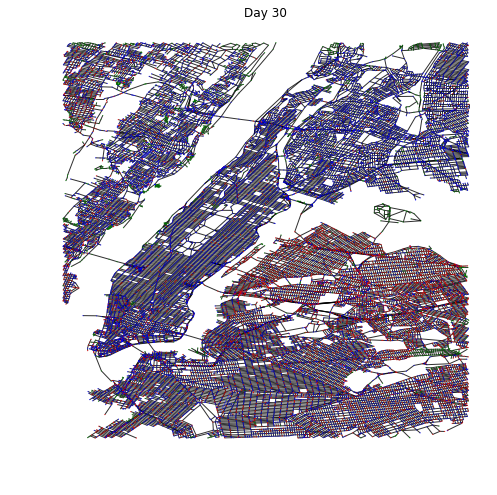

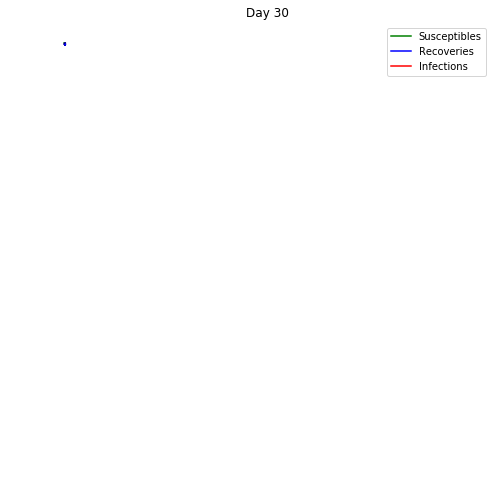

In [24]:
budget = 10000
iteration = 2
beta = 10.
gamma = 0.1
max_time = 100.
mean_s, mean_i, mean_r = strategy(budget, iteration, beta, gamma, max_time, "strat 1")
plot(mean_s, mean_i, mean_r, load().number_of_nodes())

In [25]:
day = 30
print("On average, on day " + str(day) + ", " + str(mean_s[day]/(number_of_nodes_of_G-budget)) + "% of people are susceptible")
print("On average, on day " + str(day) + ", " + str(mean_i[day]/(number_of_nodes_of_G-budget)) + "% of people are infected")
print("On average, on day " + str(day) + ", " + str(mean_r[day]/(number_of_nodes_of_G-budget)) + "% of people are recovered")

On average, on day 30, 0.2212851161944057% of people are susceptible
On average, on day 30, 0.3536496571809963% of people are infected
On average, on day 30, 1.0318245252108489% of people are recovered


Removing 10000 edges is way more effective. 10000 edges is nearly 25% of all the edges. This means that the number of people infected at the same time is smaller than removing 0 or 1000 edges. We can also see that the number of susceptible people at the end is 7.7%, which is way bigger than before

#### Exercise 2.11: Strategy 2

In [26]:
G = load()

In [27]:
def second_removal_strategy(G, budget):
    bc = nx.edge_betweenness_centrality(G,k=100)
    keys = list(bc.keys())
    values = list((bc.values()))
    biggest_n_bc = np.argsort(values)[-budget:]
    for i in biggest_n_bc:
        edge = keys[i]
        G.remove_edge(edge[0], edge[1])
        
        
    nodes_with_degree_2 = [node for node, degree in G.degree() if degree == 2]

# remove edges from nodes with degree 2
 #   for node in nodes_with_degree_2:
  #      if G.degree(node) == 2:
   #         neighbor1, neighbor2 = G.neighbors(node)
    #        G.remove_edge(node, neighbor1)
     #       G.remove_edge(node, neighbor2)
    return G

Epidemic stopped after 98.98 days | 98.98 days elapsed | 66.4% susceptible, 0.0% infected, 33.6% recovered
Epidemic stopped after 89.76 days | 89.76 days elapsed | 66.4% susceptible, 0.0% infected, 33.6% recovered
Epidemic stopped after 100.53 days | 100.53 days elapsed | 66.4% susceptible, 0.0% infected, 33.6% recovered
Epidemic stopped after 105.52 days | 105.52 days elapsed | 66.5% susceptible, 0.0% infected, 33.5% recovered
Epidemic stopped after 98.80 days | 98.80 days elapsed | 56.3% susceptible, 0.0% infected, 43.7% recovered
Epidemic stopped after 98.41 days | 98.41 days elapsed | 66.4% susceptible, 0.0% infected, 33.6% recovered
Epidemic stopped after 99.40 days | 99.40 days elapsed | 56.7% susceptible, 0.0% infected, 43.3% recovered
Epidemic stopped after 110.28 days | 110.28 days elapsed | 23.5% susceptible, 0.0% infected, 76.5% recovered
Epidemic stopped after 89.04 days | 89.04 days elapsed | 66.5% susceptible, 0.0% infected, 33.5% recovered
Epidemic stopped after 100.78 d

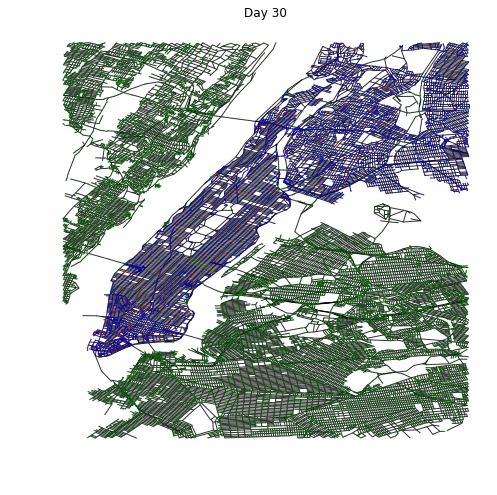

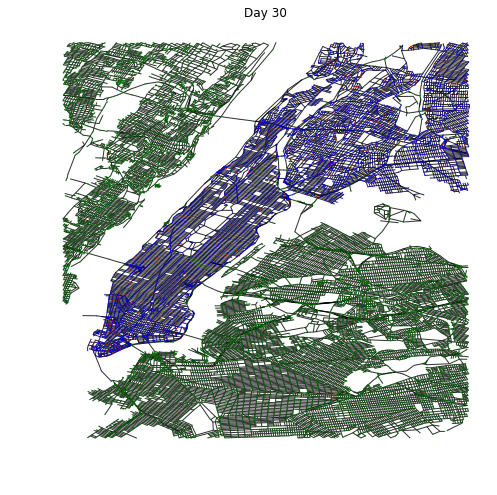

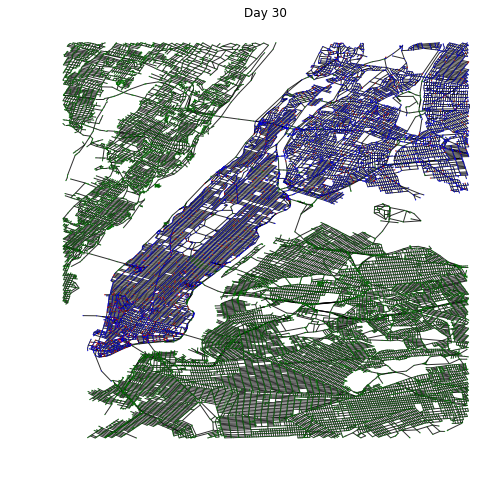

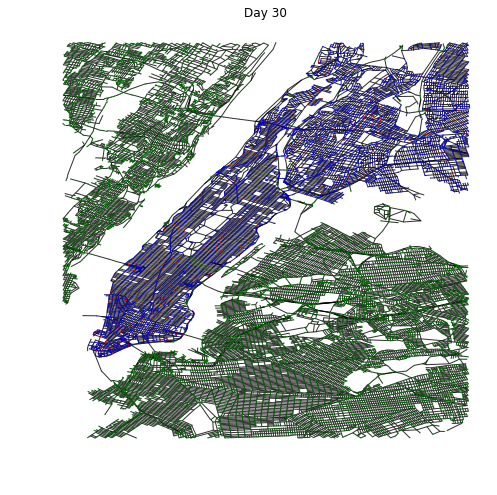

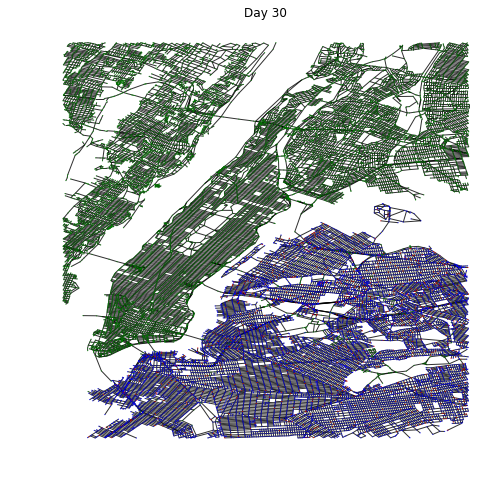

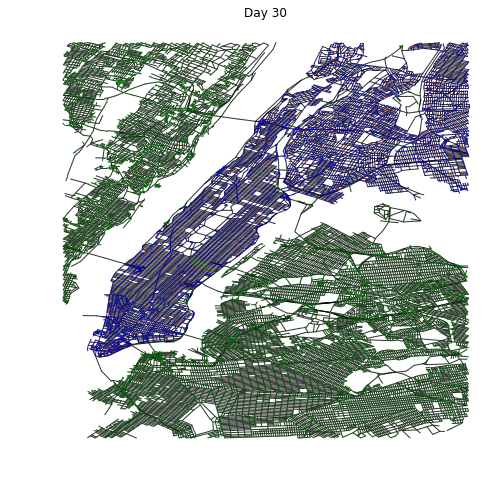

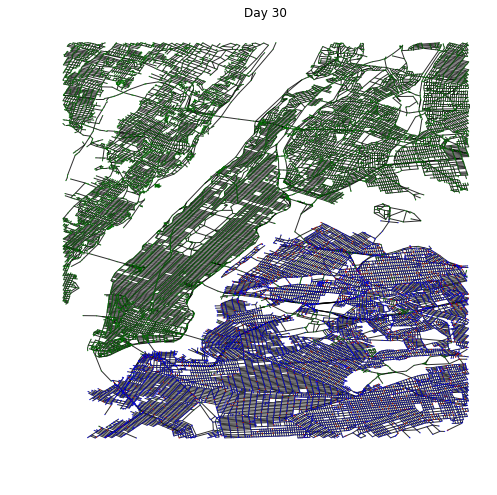

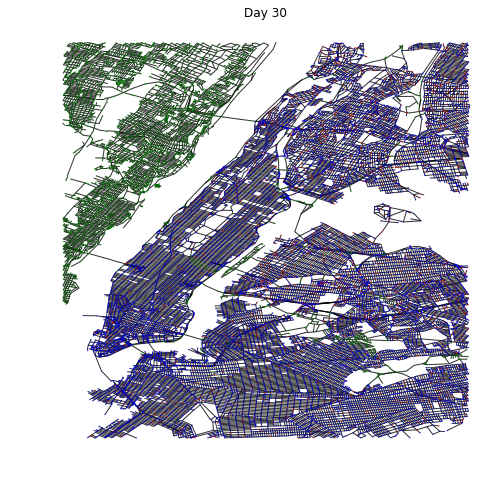

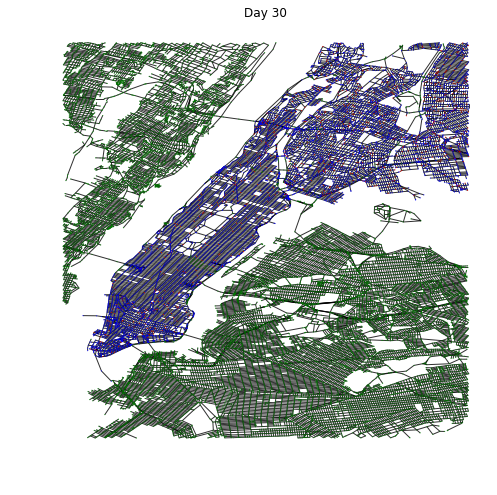

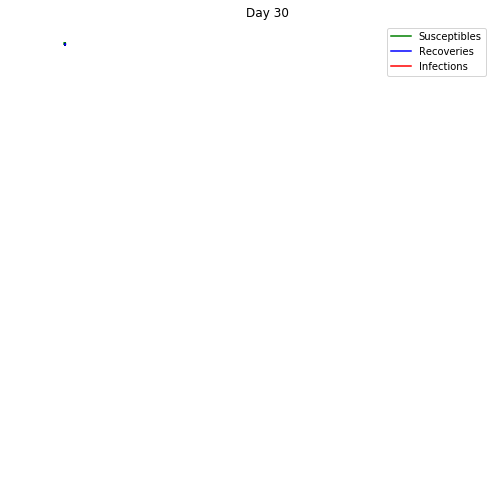

In [28]:
budget = 3000
iteration = 10
beta = 10
gamma = 0.1
max_time = 100.
s, i, r = strategy(budget, iteration, beta, gamma, max_time, "strat 2")
plot(mean_s, mean_i, mean_r, load().number_of_nodes())

Epidemic stopped after 90.29 days | 90.29 days elapsed | 66.3% susceptible, 0.0% infected, 33.7% recovered


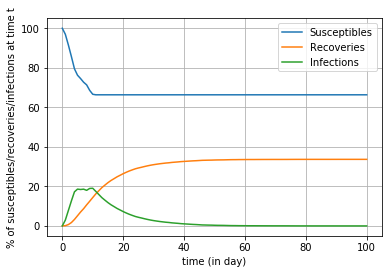

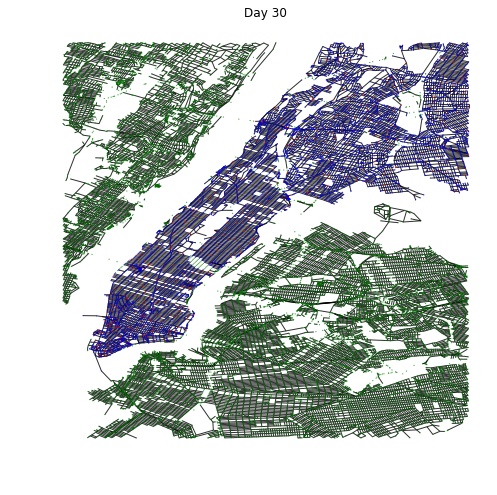

In [29]:
G = load()
beta = 10.
gamma = .1
max_time = 100.
#source = 23654
budget = 3000
G = second_removal_strategy(G, budget)
sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
nodes = list(G.nodes)
source = choice(nodes)
sir.launch_epidemic(source=source, max_time=max_time)
s, i, r = get_status(G, sir)
times = np.arange(101)
plt.plot(times, s / len(G.nodes) * 100, label = "Susceptibles")
plt.plot(times, r / len(G.nodes) * 100, label = "Recoveries")
plt.plot(times, i / len(G.nodes) * 100, label = "Infections")
plt.legend()
plt.grid()
plt.xlabel("time (in day)")
plt.ylabel("% of susceptibles/recoveries/infections at time t")
plt.show()
draw_graph(30, sir)
#bizarre, ici la contamination se stoppe entre les 2 continents, mais pas en haut

Epidemic stopped after 112.29 days | 112.29 days elapsed | 81.6% susceptible, 0.0% infected, 18.4% recovered


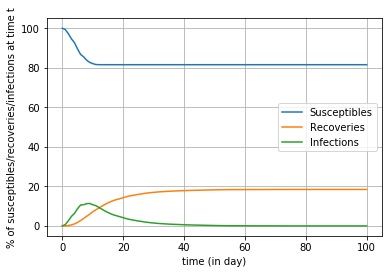

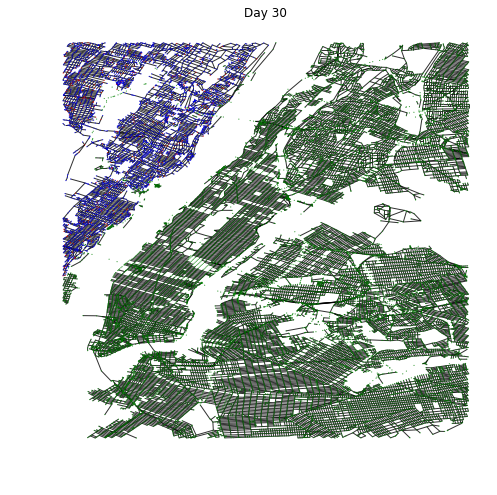

In [30]:
G = load()
bc = nx.edge_betweenness_centrality(G,k=100)
n = 3000
keys = list(bc.keys())
values = list((bc.values()))
biggest_n_bc = np.argsort(values)[-n:]
for i in biggest_n_bc:
    edge = keys[i]
    G.remove_edge(edge[0], edge[1])
    
    
sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
nodes = list(G.nodes)
source = choice(nodes)
sir.launch_epidemic(source=source, max_time=max_time)
s, i, r = get_status(G, sir)
times = np.arange(101)
plt.plot(times, s / len(G.nodes) * 100, label = "Susceptibles")
plt.plot(times, r / len(G.nodes) * 100, label = "Recoveries")
plt.plot(times, i / len(G.nodes) * 100, label = "Infections")
plt.legend()
plt.grid()
plt.xlabel("time (in day)")
plt.ylabel("% of susceptibles/recoveries/infections at time t")
plt.show()
draw_graph(30, sir)

In [31]:
G = load()

In [32]:
bc = nx.edge_betweenness_centrality(G,k=100)


In [33]:
n = 3000
keys = list(bc.keys())
values = list((bc.values()))
biggest_n_bc = np.argsort(values)[-n:]
for i in biggest_n_bc:
    edge = keys[i]
    G.remove_edge(edge[0], edge[1])
    

Epidemic stopped after 107.65 days | 107.65 days elapsed | 85.6% susceptible, 0.0% infected, 14.4% recovered


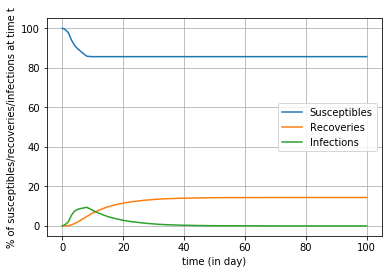

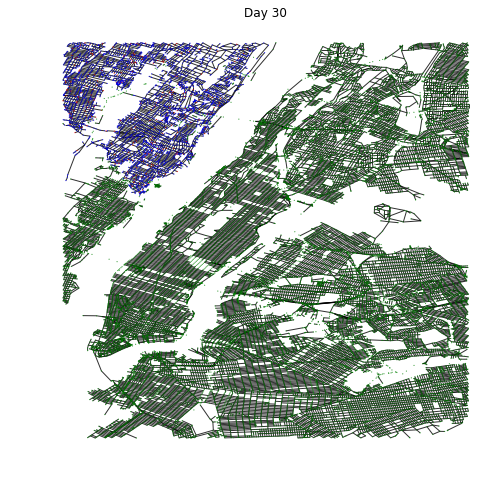

In [34]:
sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
nodes = list(G.nodes)
source = choice(nodes)
sir.launch_epidemic(source=source, max_time=max_time)
s, i, r = get_status(G, sir)
times = np.arange(101)
plt.plot(times, s / len(G.nodes) * 100, label = "Susceptibles")
plt.plot(times, r / len(G.nodes) * 100, label = "Recoveries")
plt.plot(times, i / len(G.nodes) * 100, label = "Infections")
plt.legend()
plt.grid()
plt.xlabel("time (in day)")
plt.ylabel("% of susceptibles/recoveries/infections at time t")
plt.show()
draw_graph(30, sir)